In [77]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [78]:
# Read The Data from csv file
data=pd.read_csv('data.csv')

In [79]:
# Define Label as y and   DATA as X

X=data.iloc[:,1:]
y=data.iloc[:,0]
X.shape

(70000, 784)

In [91]:
 # Split the data into a 70:30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=6)

X_train.shape

(49000, 784)

In [123]:
# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, seed):
        np.random.seed(seed)
        self.weights1 = np.random.randn(input_size, hidden_size1)
        self.bias1 = np.ones((1, hidden_size1))
        self.weights2 = np.random.randn(hidden_size1, hidden_size2)
        self.bias2 = np.ones((1, hidden_size2))
        self.weights3 = np.random.randn(hidden_size2, hidden_size3)
        self.bias3 = np.ones((1, hidden_size3))
        self.weights_out = np.random.randn(hidden_size3, output_size)
        self.bias_out = np.ones((1, output_size))

    
# Define Activation Functions    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    
# Define Forward System

    def forward(self, X):
        self.layer1_output = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.layer2_output = self.sigmoid(np.dot(self.layer1_output, self.weights2) + self.bias2)
        self.layer3_output = self.sigmoid(np.dot(self.layer2_output, self.weights3) + self.bias3)
        self.output = self.softmax(np.dot(self.layer3_output, self.weights_out) + self.bias_out)
        return self.output

    
#Define Backward Propogation     
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]

       
    
    # Calculate the gradients
        
        output_error = self.output - y
        weights_out_gradient = np.dot(self.layer3_output.T, output_error)
        bias_out_gradient = np.sum(output_error, axis=0, keepdims=True)

        layer3_error = np.dot(output_error, self.weights_out.T) * self.layer3_output * (1 - self.layer3_output)
        weights3_gradient = np.dot(self.layer2_output.T, layer3_error)
        bias3_gradient = np.sum(layer3_error, axis=0, keepdims=True)

        layer2_error = np.dot(layer3_error, self.weights3.T) * self.layer2_output * (1 - self.layer2_output)
        weights2_gradient = np.dot(self.layer1_output.T, layer2_error)
        bias2_gradient = np.sum(layer2_error, axis=0, keepdims=True)

        layer1_error = np.dot(layer2_error, self.weights2.T) * self.layer1_output * (1 - self.layer1_output)
        weights1_gradient = np.dot(X.T, layer1_error)
        bias1_gradient = np.sum(layer1_error, axis=0, keepdims=True)

       
    
    # Update weights and biases
        self.weights_out -= learning_rate * weights_out_gradient / m
        self.bias_out -= learning_rate * bias_out_gradient / m

        self.weights3 -= learning_rate * weights3_gradient / m
        self.bias3 -= learning_rate * bias3_gradient / m

        self.weights2 -= learning_rate * weights2_gradient / m
        self.bias2 -= learning_rate * bias2_gradient / m

        self.weights1 -= learning_rate * weights1_gradient / m
        self.bias1 -= learning_rate * bias1_gradient / m

    
    
#Define Train Function    
   
    def train(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]
        history = {'accuracy': [], 'loss': []}

        # Convert y to one-hot encoding
        y_one_hot = np.eye(self.bias_out.shape[1])[y]

        
        # Training loop
        for epoch in range(epochs):
            for i in range(0, m, batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y_one_hot[i:i + batch_size]

               
            
            # Forward pass
                self.forward(X_batch)

              
            # Backward pass
                self.backward(X_batch, y_batch, learning_rate)

            
            
# Calculate and print accuracy and loss for each epoch
            predictions = np.argmax(self.forward(X), axis=1)
            accuracy = np.mean(predictions == y)
            loss = -np.mean(np.sum(y_one_hot * np.log(self.output + 1e-8), axis=1))
           
        
        # Append accuracy and loss to history
            history['accuracy'].append(accuracy)
            history['loss'].append(loss)

            print(f'Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}, Loss: {loss:.4f}')

        return history 

           
 #print(f'Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.4f}, Loss: {loss:.4f}')

    
#Define Prediction Function    
   
    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)



In [125]:
# Set the neural network parameters

input_size = X_train.shape[1]
output_size = 10  # Number of classes
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
seed = 6  # As My Roll_no is P23CS006
learning_rate = 0.01
epochs = 25
batch_size = 23

In [126]:
# Create neural network
nn = NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size, seed)


In [127]:
# Train the neural network
history=nn.train(X_train,y_train, epochs, learning_rate, batch_size)

# Test the neural network
predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f'Test Accuracy: {accuracy:.4f}')



C:\Users\ravin\AppData\Local\Temp\ipykernel_4692\1835679377.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 1/25, Accuracy: 0.4733, Loss: 1.4617
Epoch 2/25, Accuracy: 0.5707, Loss: 1.1785
Epoch 3/25, Accuracy: 0.6115, Loss: 1.0466
Epoch 4/25, Accuracy: 0.6239, Loss: 0.9921
Epoch 5/25, Accuracy: 0.6578, Loss: 0.9098
Epoch 6/25, Accuracy: 0.6700, Loss: 0.8706
Epoch 7/25, Accuracy: 0.6847, Loss: 0.8449
Epoch 8/25, Accuracy: 0.6808, Loss: 0.8255
Epoch 9/25, Accuracy: 0.7010, Loss: 0.7822
Epoch 10/25, Accuracy: 0.6989, Loss: 0.7767
Epoch 11/25, Accuracy: 0.7026, Loss: 0.7722
Epoch 12/25, Accuracy: 0.7037, Loss: 0.7733
Epoch 13/25, Accuracy: 0.7153, Loss: 0.7584
Epoch 14/25, Accuracy: 0.7153, Loss: 0.7411
Epoch 15/25, Accuracy: 0.7247, Loss: 0.7279
Epoch 16/25, Accuracy: 0.7250, Loss: 0.7258
Epoch 17/25, Accuracy: 0.7231, Loss: 0.7298
Epoch 18/25, Accuracy: 0.7295, Loss: 0.7127
Epoch 19/25, Accuracy: 0.7305, Loss: 0.7108
Epoch 20/25, Accuracy: 0.7313, Loss: 0.6966
Epoch 21/25, Accuracy: 0.7341, Loss: 0.6977
Epoch 22/25, Accuracy: 0.7360, Loss: 0.6891
Epoch 23/25, Accuracy: 0.7397, Loss: 0.67

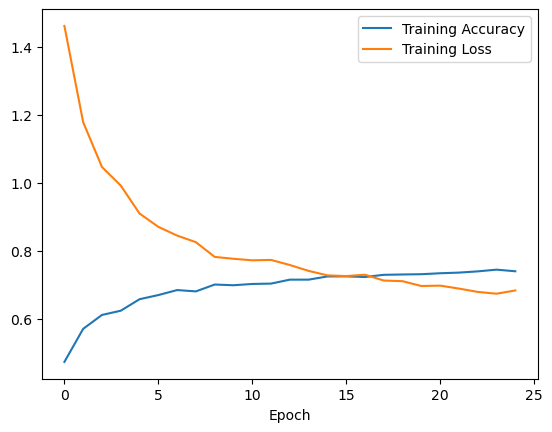

In [130]:
# Plot accuracy and loss per epoch


plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()